In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
X = np.random.rand(50,2)
Y =2 + np.random.rand(50,2)
Z = np.concatenate((X,Y))
Z = pd.DataFrame(Z)
Z.head()

,0,1
0,0.862331,0.996022
1,0.046041,0.448717
2,0.451160,0.669499
3,0.175785,0.766115
4,0.587389,0.715545


<AxesSubplot:xlabel='0', ylabel='1'>

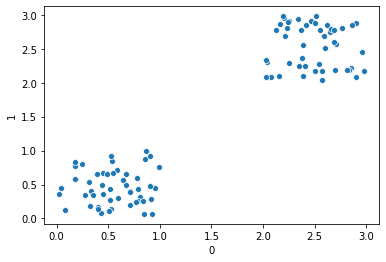

In [5]:
sns.scatterplot(Z[0], Z[1])

In [6]:
clusters = KMeans(n_clusters=2)
clusters.fit(Z)

KMeans(n_clusters=2)

In [9]:
label = clusters.predict(Z)

<AxesSubplot:xlabel='0', ylabel='1'>

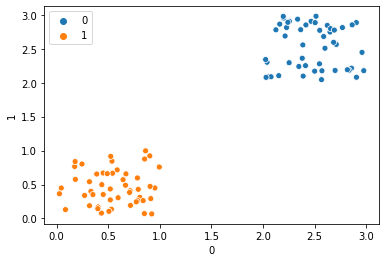

In [10]:
sns.scatterplot(Z[0], Z[1], hue = label)

In [11]:
silhouette_score(Z, label)

0.8215151891608872

<AxesSubplot:xlabel='0', ylabel='1'>

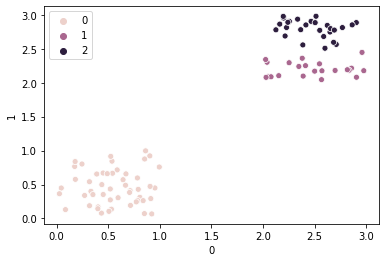

In [13]:
clusters = KMeans(n_clusters=3)
clusters.fit(Z)
label = clusters.predict(Z)
sns.scatterplot(Z[0], Z[1], hue = label)

In [15]:
silhouette_score(Z, label)

0.6404453535839295

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
modelo = KMeans(n_clusters=3, random_state=42)
modelo.fit(X)
modelo.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
score = silhouette_score(X, modelo.labels_)
score

0.5528190123564095

In [ ]:
!pip install yellowbrick

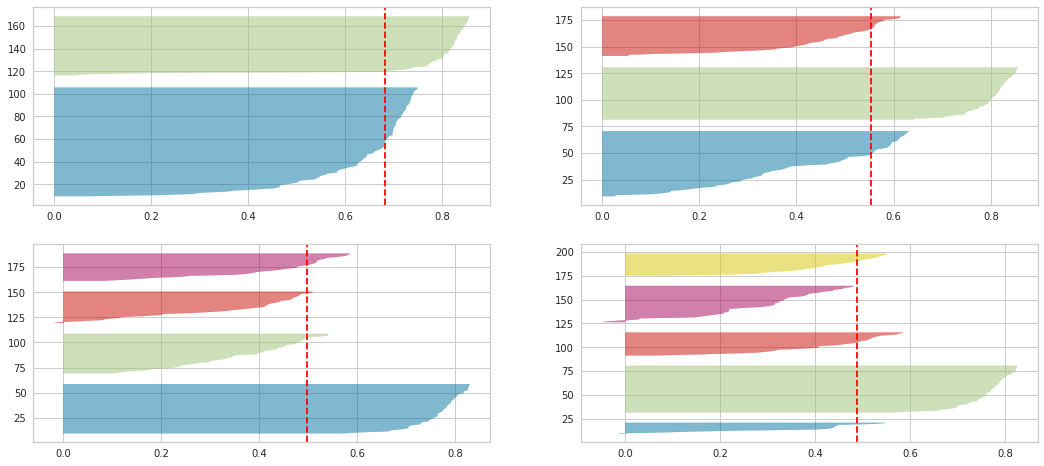

In [37]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(18,8))

for i in [2, 3, 4, 5]:
    modelo = KMeans(n_clusters=i, random_state=42, n_init = 10, max_iter=100)
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(modelo, colors = 'yellowbrick', ax = ax[q -1 ][mod])
    visualizer.fit(X)

In [38]:
df = pd.read_csv('../Datos/faithful.csv')
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


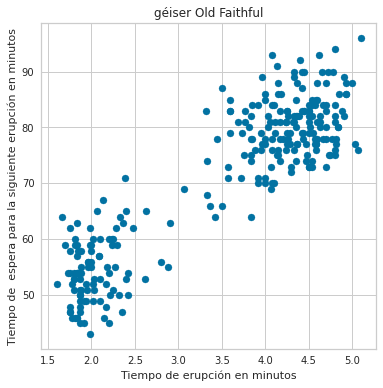

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.xlabel('Tiempo de erupción en minutos')
plt.ylabel('Tiempo de  espera para la siguiente erupción en minutos')
plt.title('géiser Old Faithful')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

## Método del codo

Text(0, 0.5, 'Suma de la distancia al cuadrado')

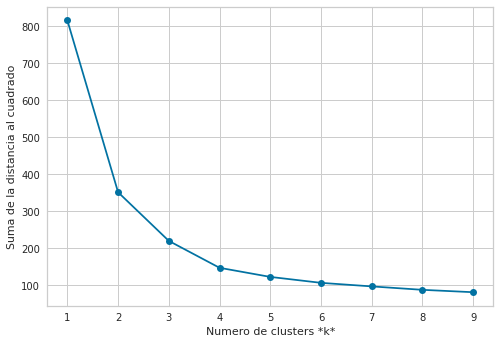

In [53]:
list_k = list(range(1,10))
sse = [] # Suma de la distancia al cuadrado

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)
    
plt.plot(list_k, sse, '-o')    
plt.xlabel(r'Numero de clusters *k*')
plt.ylabel('Suma de la distancia al cuadrado')

In [65]:
km = KMeans(n_clusters=2)
km.fit(X_std)

KMeans(n_clusters=2)

In [66]:
score = silhouette_score(X_std, km.labels_, metric='euclidean')
score

0.5259233728751497

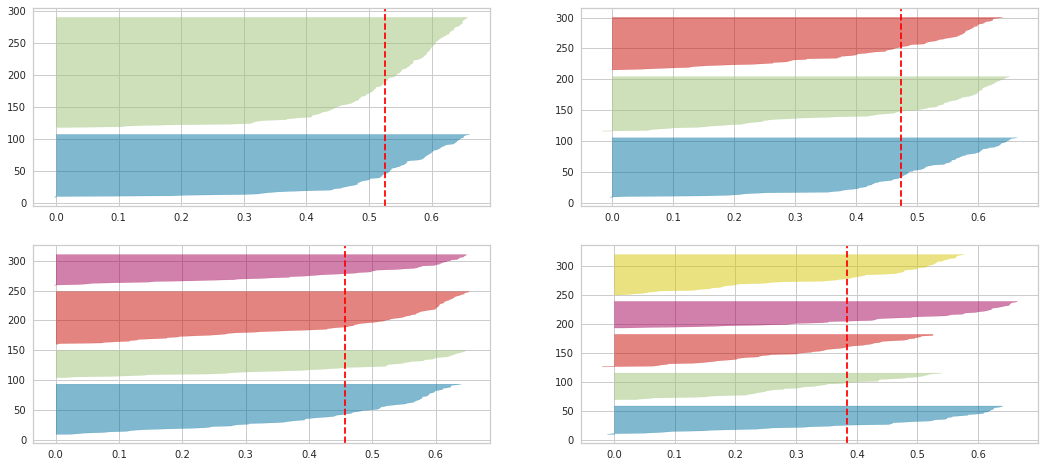

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(18,8))

for i in [2, 3, 4, 5]:
    modelo = KMeans(n_clusters=i, random_state=42, n_init = 10, max_iter=100)
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(modelo, colors = 'yellowbrick', ax = ax[q -1 ][mod])
    visualizer.fit(X_std)

In [69]:
dataset = pd.read_csv('../Datos/Mall_Customers.csv', sep = ',')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

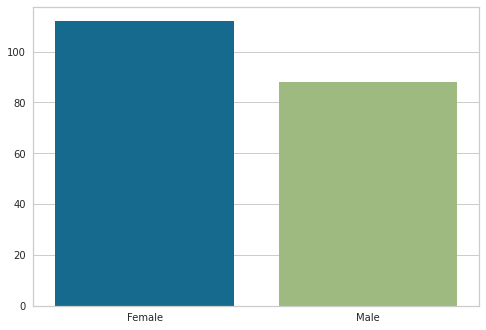

In [71]:
# 1er insigth
sexo_customers = dataset['Genre'].value_counts()
sns.barplot(x = sexo_customers.index, y = sexo_customers.values)

In [72]:
## 2do insight (rango de edades)
edad_18_25 = dataset['Age'][(dataset['Age']>=18) & (dataset['Age']<25)]
edad_25_35 = dataset['Age'][(dataset['Age']>=25) & (dataset['Age']<35)]
edad_35_45 = dataset['Age'][(dataset['Age']>=35) & (dataset['Age']<45)]
edad_45_55 = dataset['Age'][(dataset['Age']>=45) & (dataset['Age']<55)]
edad_55_mas = dataset['Age'][(dataset['Age']>=55)]


In [73]:
x = ['18-24', '25-34', '35-44', '45-54', '55+']
y = [len(edad_18_25), len(edad_25_35), len(edad_35_45), len(edad_45_55), len(edad_55_mas)]

Text(0, 0.5, 'Número de clientes')

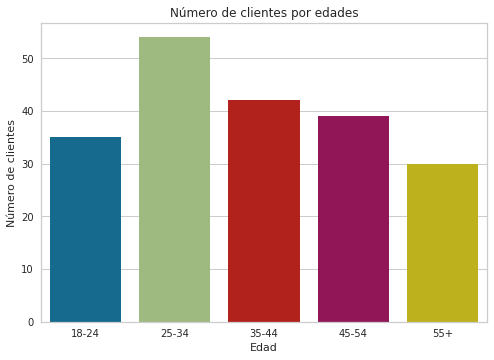

In [74]:
plt.figure()
sns.barplot(x=x, y = y)
plt.title('Número de clientes por edades')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')

In [75]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [80]:
X = dataset.iloc[:, [3,4]].values

Text(0, 0.5, 'Suma de la distancia al cuadrado')

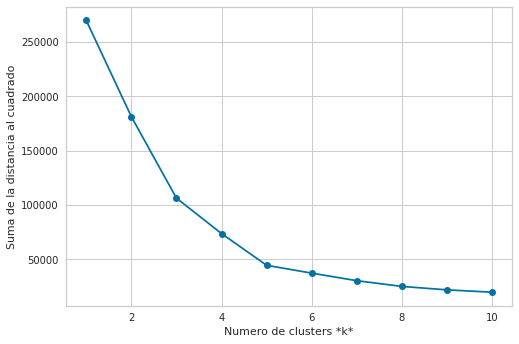

In [81]:
list_k = list(range(1,11))
sse = [] # Suma de la distancia al cuadrado

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.plot(list_k, sse, '-o')    
plt.xlabel(r'Numero de clusters *k*')
plt.ylabel('Suma de la distancia al cuadrado')

Los cluster toman valores de 1 a 10 y de cada uno obtenemos el atributo de inercia. El k óptimo es 5. Es donde la suma de inercias deja de cambiar drasticamente

In [95]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = km.predict(X)

In [98]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [88]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

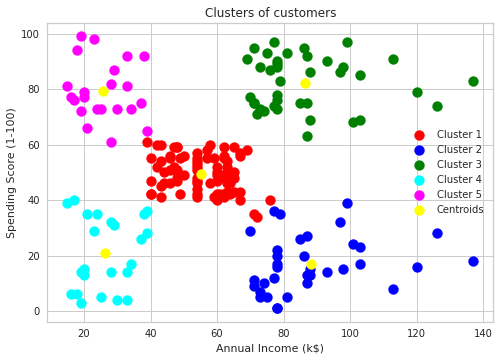

In [91]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [96]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


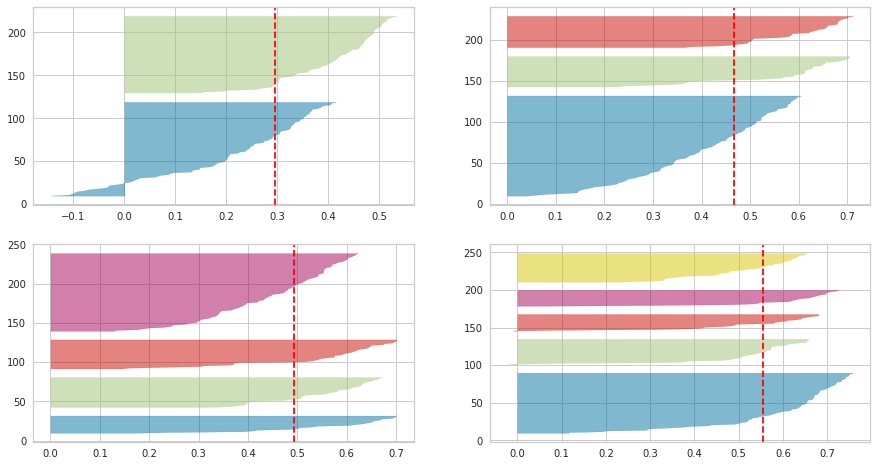

In [97]:

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)